In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated World Happiness dataset based on provided structure
data = pd.read_csv('world_happiness.csv')

df = pd.DataFrame(data)

# Create a binary classification target (High Happiness vs Low Happiness)
median_happiness = df["happiness_score"].median()
df["happiness_level"] = np.where(df["happiness_score"] >= median_happiness, 1, 0)

# Drop non-numeric and unnecessary columns for classification
X = df.drop(columns=["country", "region", "happiness_score", "happiness_level"])
y = df["happiness_level"]

print(df.dtypes)

#Encoding the columns
df['region'] = LabelEncoder().fit_transform(df['region'])
df['country'] = LabelEncoder().fit_transform(df['country'])

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
year                              int64
happiness_level                   int32
dtype: object


Dataset Overview:
   country  region  happiness_score  gdp_per_capita  social_support  \
0      147      10            7.587         1.39651         1.34951   
1       63      10            7.561         1.30232         1.40223   
2       40      10            7.527         1.32548         1.36058   
3      112      10            7.522         1.45900         1.33095   
4       25       6            7.427         1.32629         1.32261   

   healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
0                  0.94143                       0.66557     0.29678   
1                  0.94784                       0.62877     0.43630   
2                  0.87464                       0.64938     0.34139   
3                  0.88521                       0.66973     0.34699   
4                  0.90563                       0.63297     0.45811   

   perceptions_of_corruption  year  happiness_level  
0                    0.41978  2015                1  
1             

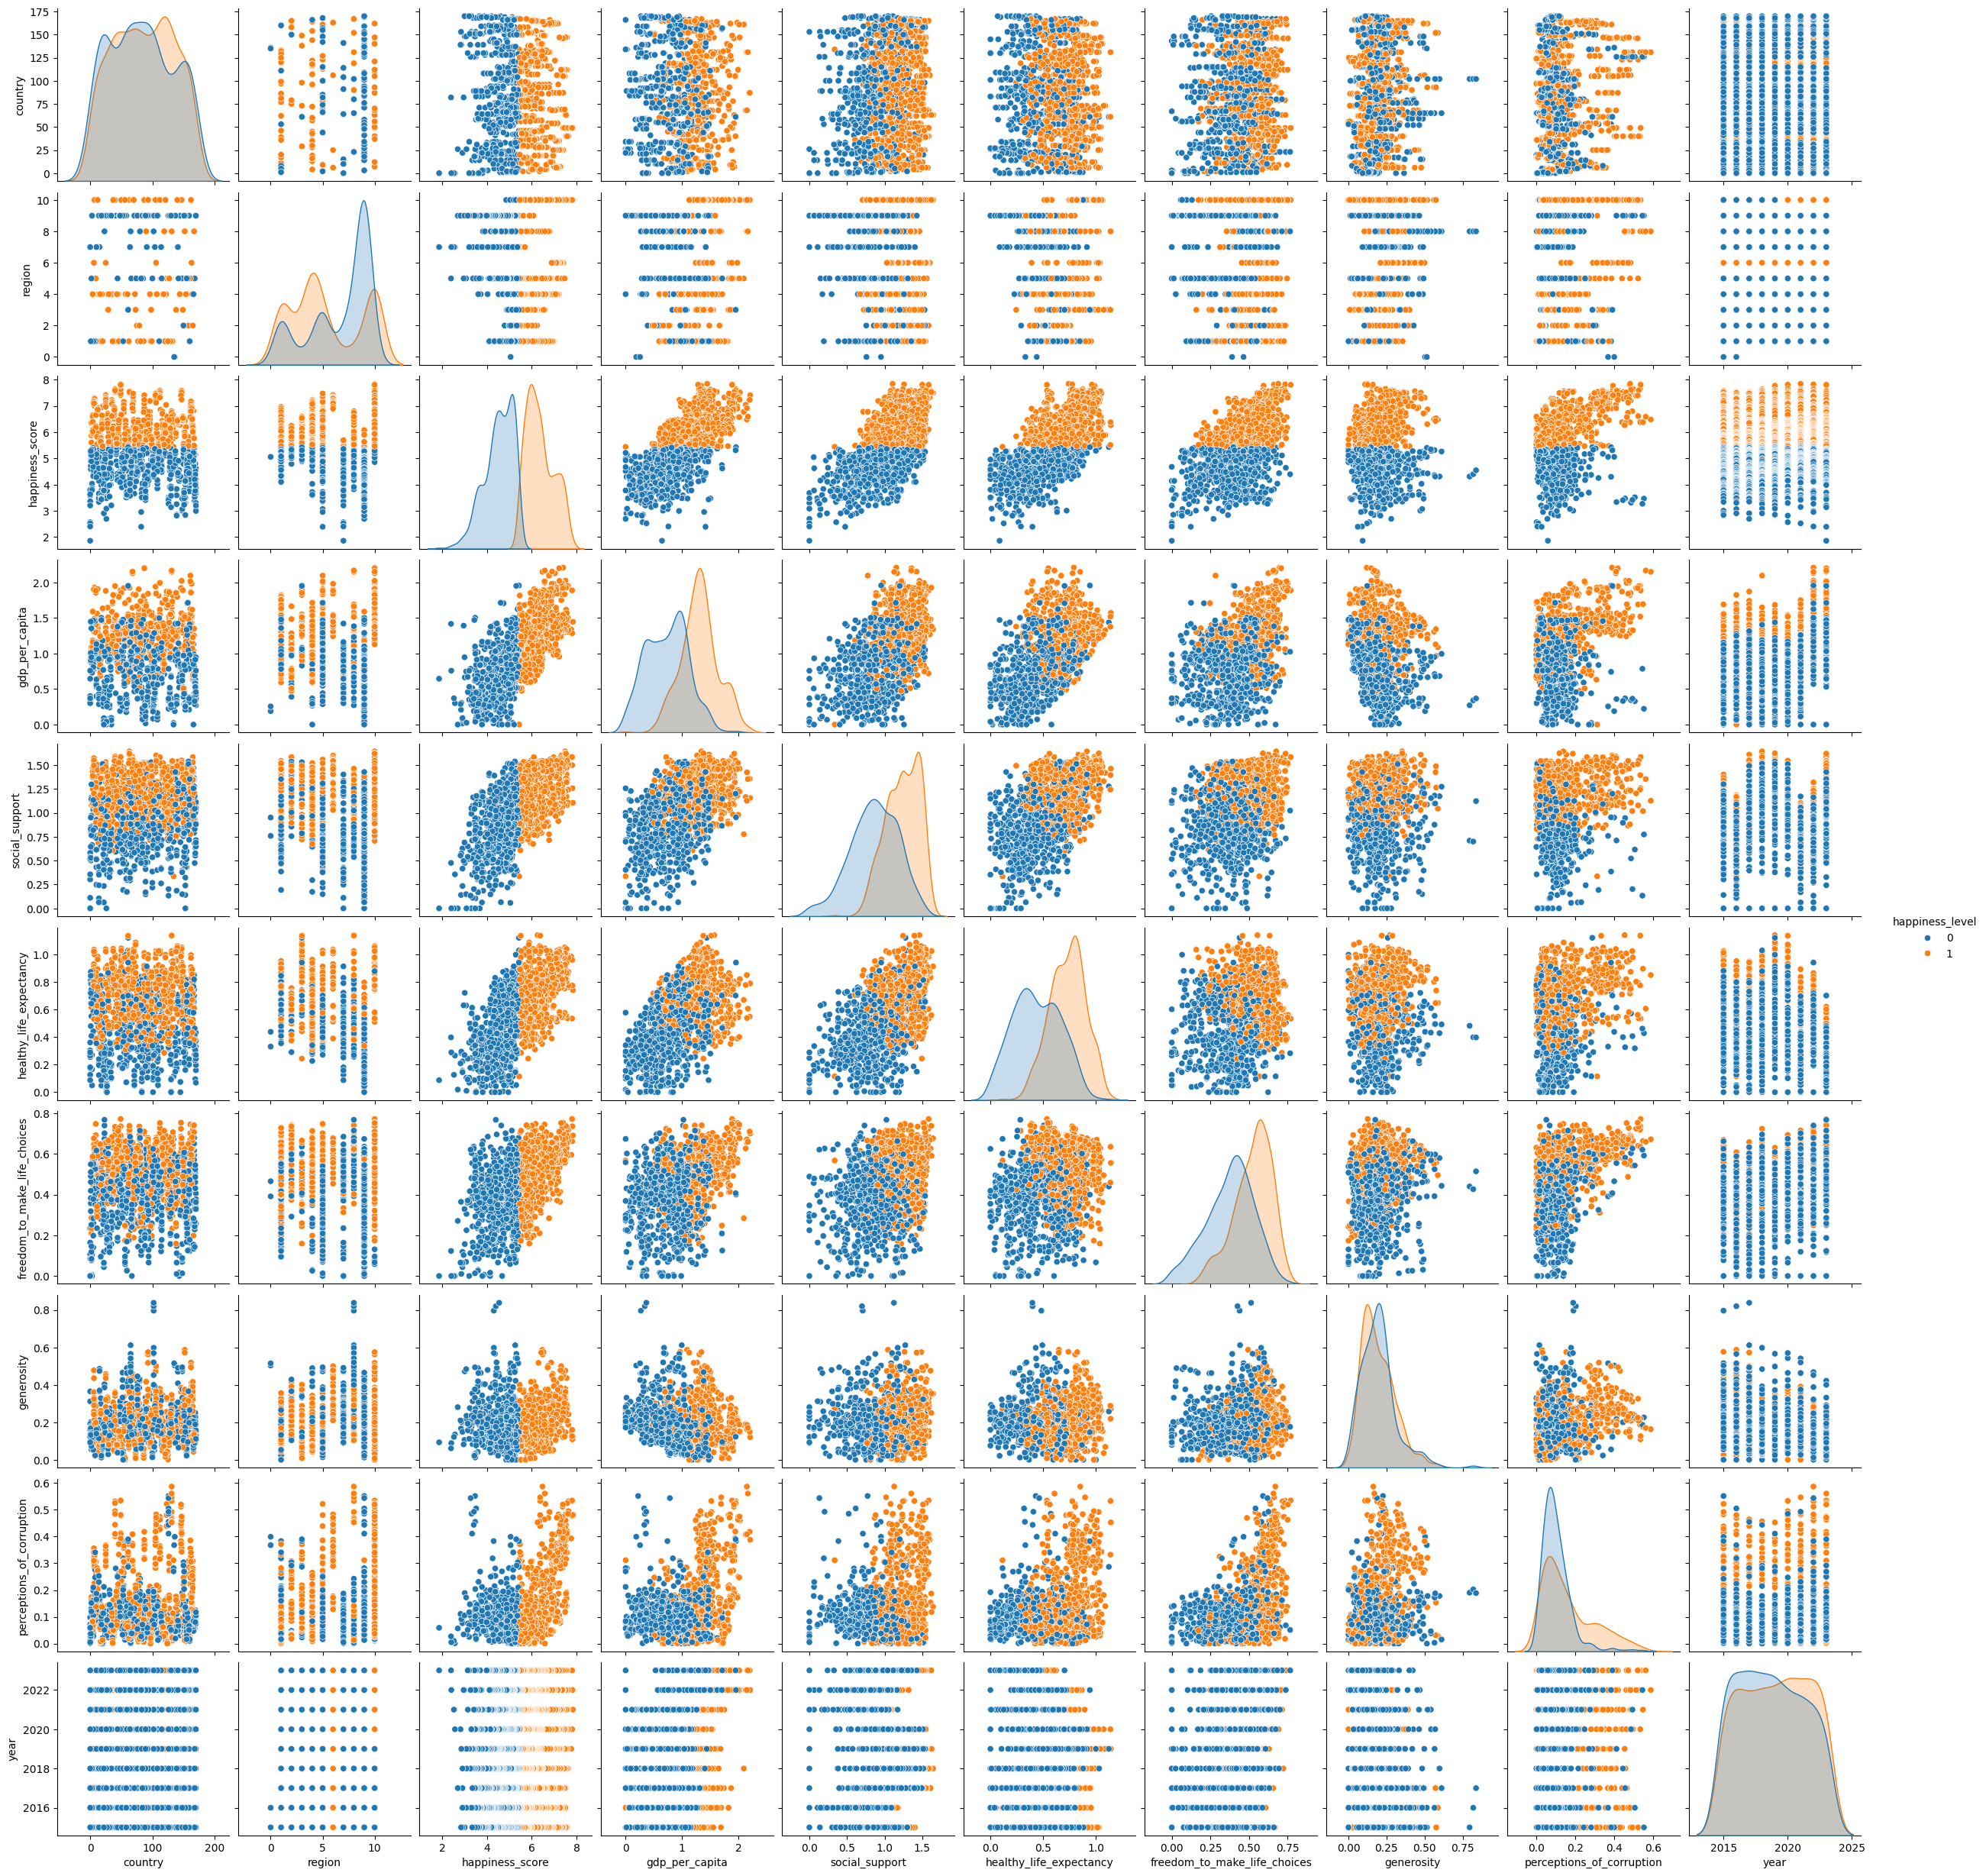

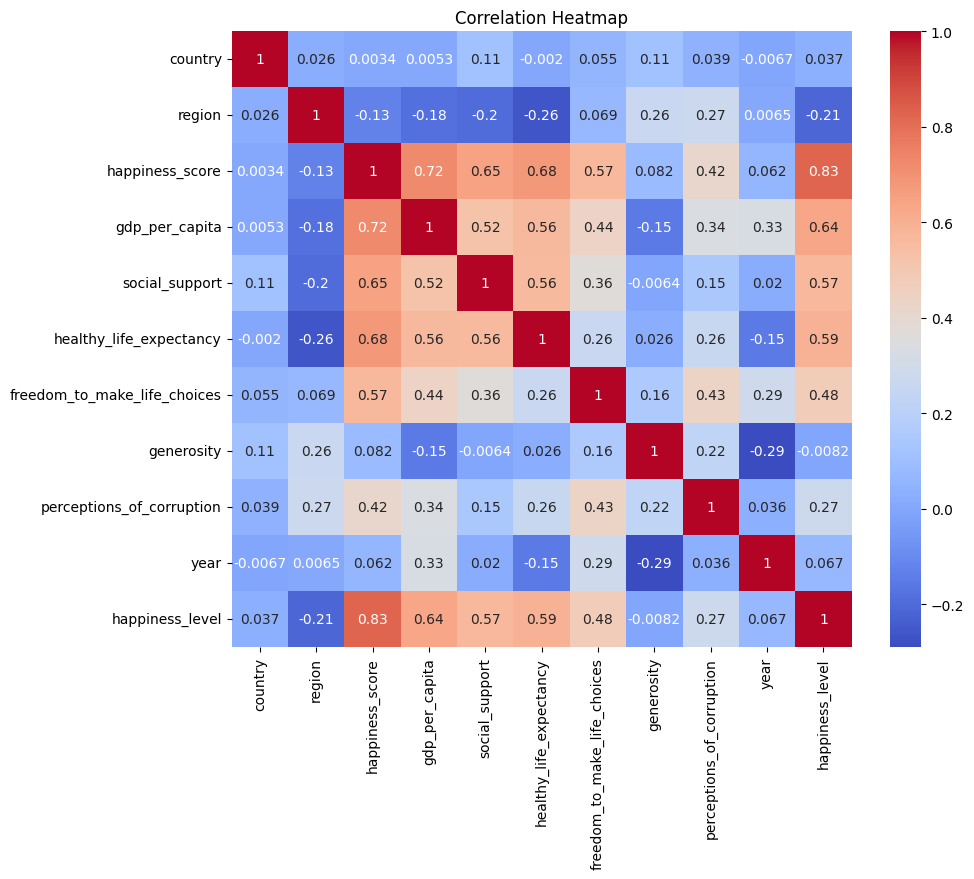

In [ ]:
# 1. Detailed EDA
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDescriptive Statistics:")
print(df.describe())

sns.pairplot(df, hue="happiness_level")
plt.show()

# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2. Decision Tree Classifier with Gini Index
gini_tree = DecisionTreeClassifier(criterion="gini", random_state=42)
gini_tree.fit(X_train, y_train)
y_pred_gini = gini_tree.predict(X_test)

In [ ]:
# 3. Decision Tree Classifier with Entropy
entropy_tree = DecisionTreeClassifier(criterion="entropy", random_state=42)
entropy_tree.fit(X_train, y_train)
y_pred_entropy = entropy_tree.predict(X_test)

In [ ]:
# 4. Accuracy Check
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print("\nAccuracy with Gini Index:", accuracy_gini)
print("Accuracy with Entropy:", accuracy_entropy)


Accuracy with Gini Index: 0.8722627737226277
Accuracy with Entropy: 0.843065693430657


In [ ]:
# 5. Precision, Recall, F1-Score
print("\nClassification Report for Gini Index:")
print(classification_report(y_test, y_pred_gini))

print("Classification Report for Entropy:")
print(classification_report(y_test, y_pred_entropy))


Classification Report for Gini Index:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       130
           1       0.88      0.88      0.88       144

    accuracy                           0.87       274
   macro avg       0.87      0.87      0.87       274
weighted avg       0.87      0.87      0.87       274

Classification Report for Entropy:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.89      0.81      0.84       144

    accuracy                           0.84       274
   macro avg       0.84      0.85      0.84       274
weighted avg       0.85      0.84      0.84       274



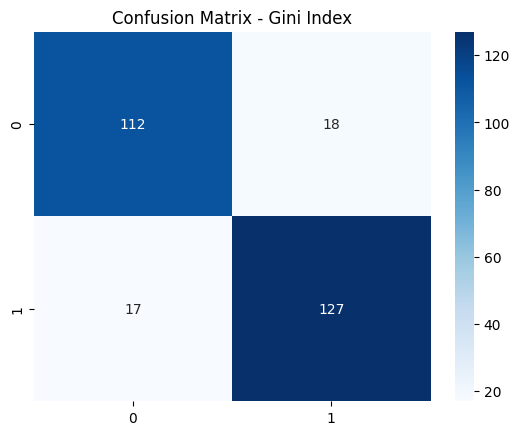

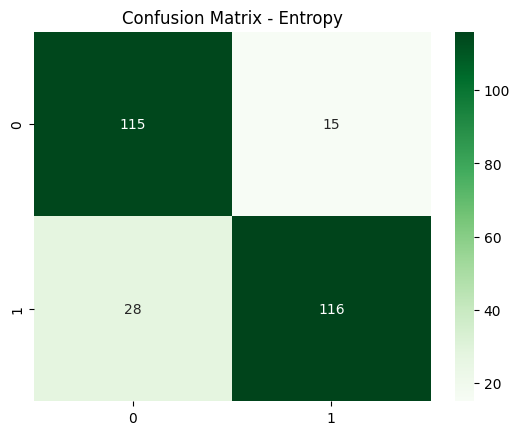

In [ ]:
# 6. Confusion Matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

sns.heatmap(cm_gini, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gini Index")
plt.show()

sns.heatmap(cm_entropy, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Entropy")
plt.show()

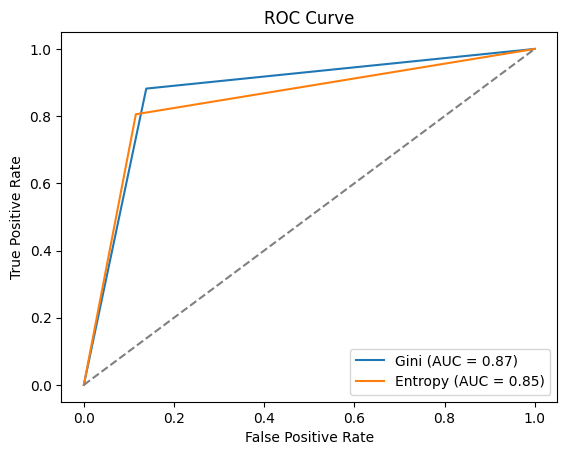

In [ ]:
# 7. ROC Curve (for both models)
plt.figure()
for model, label in zip([gini_tree, entropy_tree], ["Gini", "Entropy"]):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

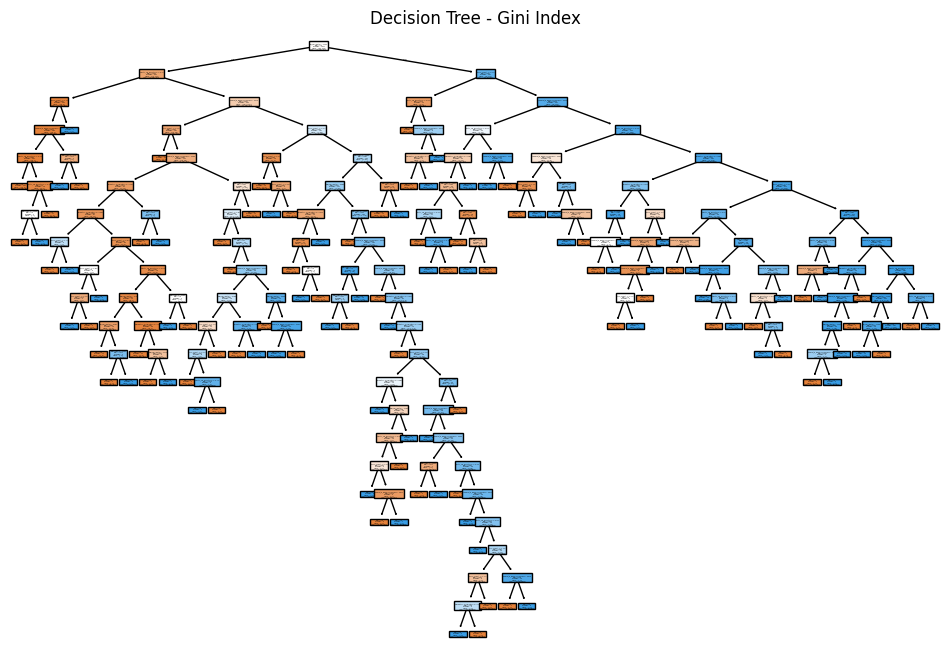

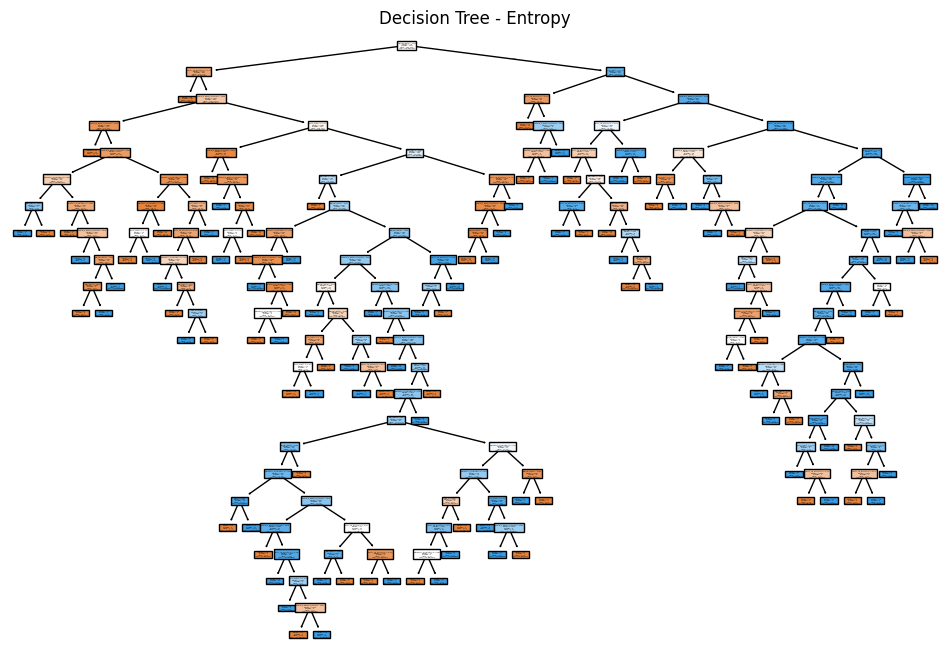

In [ ]:
# 8. Visualization of Trees
plt.figure(figsize=(12, 8))
plot_tree(gini_tree, feature_names=X.columns, class_names=["Low Happiness", "High Happiness"], filled=True)
plt.title("Decision Tree - Gini Index")
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(entropy_tree, feature_names=X.columns, class_names=["Low Happiness", "High Happiness"], filled=True)
plt.title("Decision Tree - Entropy")
plt.show()

In [ ]:
# 9. Results and Conclusion
print("\nComparative Analysis:")
print(f"Gini Index - Accuracy: {accuracy_gini:.2f}, Precision: {precision_score(y_test, y_pred_gini):.2f}, Recall: {recall_score(y_test, y_pred_gini):.2f}, F1-Score: {f1_score(y_test, y_pred_gini):.2f}")
print(f"Entropy - Accuracy: {accuracy_entropy:.2f}, Precision: {precision_score(y_test, y_pred_entropy):.2f}, Recall: {recall_score(y_test, y_pred_entropy):.2f}, F1-Score: {f1_score(y_test, y_pred_entropy):.2f}")


Comparative Analysis:
Gini Index - Accuracy: 0.87, Precision: 0.88, Recall: 0.88, F1-Score: 0.88
Entropy - Accuracy: 0.84, Precision: 0.89, Recall: 0.81, F1-Score: 0.84
